# Image Classification

## Importing dependencies

In [102]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.6
Tensorflow version: 2.1.0
Keras version: 2.2.4-tf


## Loading the model

https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [103]:
model = tf.keras.applications.MobileNetV2()

In [104]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In order to plot the model the `graphviz` should be installed. For Mac OS it may be installed using `brew` like `brew install graphviz`.

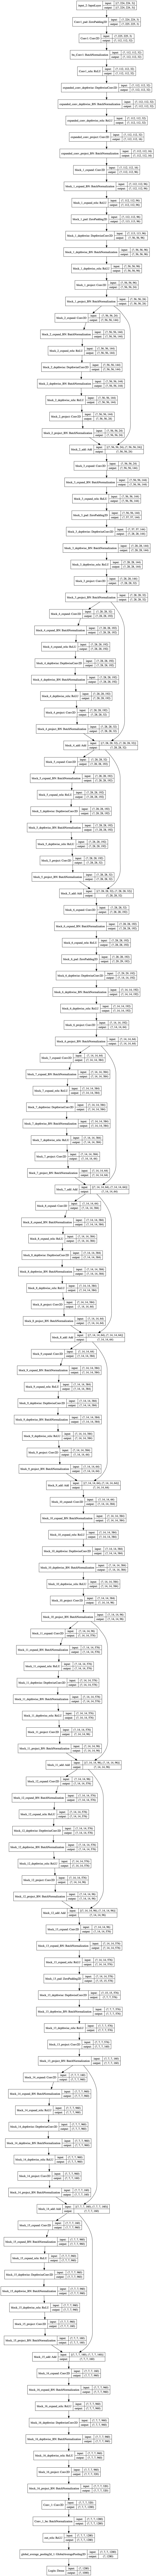

In [105]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [106]:
INPUT_IMAGE_SIZE = model.get_input_shape_at(0)[1]
INPUT_IMAGE_SIZE

224

In [107]:
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
)
imagenet_labels = np.array(
    open(labels_path).read().splitlines()
)

In [108]:
imagenet_labels.shape

(1001,)

In [109]:
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

In [110]:
test_image_path = './data/banana.jpg'
test_image = tf.keras.preprocessing.image.load_img(
    test_image_path,
    target_size=[INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE]
)

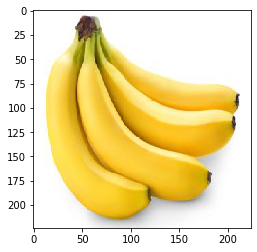

In [111]:
plt.imshow(test_image)

In [112]:
test_input = tf.keras.preprocessing.image.img_to_array(test_image)

In [113]:
test_input.shape

(224, 224, 3)

In [114]:
test_input

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [115]:
test_input_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(
    test_input[tf.newaxis, ...]
)

In [116]:
test_input_preprocessed.shape

(1, 224, 224, 3)

In [117]:
test_input_preprocessed

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]], dtype=float32)

In [118]:
result = model(test_input_preprocessed)

In [119]:
result.shape

TensorShape([1, 1000])

In [120]:
result

<tf.Tensor: shape=(1, 1000), dtype=float32, numpy=
array([[6.27256741e-05, 2.49076384e-05, 2.92051100e-05, 3.66856038e-05,
        1.41568653e-05, 4.05591127e-05, 2.07224839e-05, 5.90266136e-05,
        8.64975591e-05, 1.55985123e-04, 9.85823863e-05, 2.00868468e-04,
        3.62483479e-05, 2.38833218e-05, 5.74451042e-05, 5.17840599e-05,
        1.72888991e-04, 1.41889061e-04, 3.12768476e-04, 2.15080741e-04,
        4.07511507e-05, 3.32811265e-04, 1.21264653e-04, 2.12810453e-04,
        1.42057368e-04, 5.98373372e-05, 5.80516993e-04, 6.78443612e-05,
        8.38330307e-05, 7.96212480e-05, 4.06210092e-05, 9.22325198e-05,
        8.93434335e-05, 1.99521619e-05, 4.75170964e-05, 5.67715142e-05,
        8.95328703e-05, 9.73007191e-05, 7.21925462e-05, 9.88510728e-05,
        5.47226227e-05, 8.55796461e-05, 9.38306330e-05, 2.24222851e-04,
        3.10534320e-04, 7.11312823e-05, 6.25849570e-05, 7.02485559e-05,
        1.41088502e-04, 3.26961017e-05, 3.27529306e-05, 4.06065265e-05,
        2.996

In [121]:
sorted_result = np.argsort(result)

In [122]:
sorted_result.shape

(1, 1000)

In [123]:
sorted_reshaped_result = sorted_result[0,::-1]

In [124]:
sorted_reshaped_result.shape

(1000,)

In [125]:
sorted_reshaped_result

array([954, 942, 940, 939, 945, 941, 950, 858, 666, 506, 790, 779, 600,
       110, 673, 584, 616, 678, 502, 464, 185, 824, 784,  93, 936, 987,
       840, 951, 873, 457, 962, 953, 189, 990, 501, 701, 955, 932, 435,
       797, 979, 911,  26, 400, 186, 991, 838, 117, 680, 121, 972, 557,
       317, 414, 590, 537,  59, 248, 892,  68, 956, 767, 568, 885,  53,
       170, 220, 309, 524, 373, 241, 405, 679, 879, 720, 589, 944, 857,
       641, 299, 739, 219, 943, 677, 527, 656, 948, 842, 264,  83, 161,
        63, 355, 602, 998,  21, 929, 645, 601, 826, 861, 831, 823, 647,
        18,  44, 555, 613, 996, 959,  66, 899, 715, 493, 934,  52, 775,
       670, 507, 426, 473,  54, 291,  74, 672, 187, 296, 372, 486, 179,
       292, 671, 878, 214, 792, 345, 591, 636, 340, 891, 112, 573, 916,
       665, 144, 281, 251, 306, 468, 107, 463, 964, 146, 681, 260, 832,
       995,  56, 261, 912, 516, 876, 801, 608, 427, 151, 807, 682, 550,
       336, 119, 116, 937, 398, 256, 828,  96, 145, 240,  43, 77

In [126]:
max_classes = 5
decoded = imagenet_labels[sorted_reshaped_result + 1][:max_classes]

In [162]:
probability_threshold = 0.01
np_result = result.numpy()[0]

# s = np.argsort(result)
# s

# result_filtered = result > probability_threshold
# result[result_filtered]

# _, result_indices = np.where(result > probability_threshold)
# result_indices

# np_result_filtered = np_result > probability_threshold
# filtered_index_array = np.where(np_result_filtered)
# index_array = np.argsort(np_result)
# ff
# print('Filtered indices:', filtered_index_array)
# print('Sorted indices:', index_array[-5:])
# np.take_along_axis(r, index_array, axis=0)

np_result_mask = np_result > probability_threshold
np_result_filtered = np_result[np_result_mask]
imagenet_labels_filtered = imagenet_labels[1:][np_result_mask]
index_array = np.argsort(np_result_filtered)
imagenet_labels_filtered_sorted = imagenet_labels_filtered[index_array]


print('np_result_filtered:', np_result_filtered)
print('imagenet_labels_filtered:', imagenet_labels_filtered)
print('index_array:', index_array)
print('imagenet_labels_filtered_sorted:', imagenet_labels_filtered_sorted)

np_result_filtered: [0.01190142 0.02559635 0.03040617 0.7720705 ]
imagenet_labels_filtered: ['zucchini' 'spaghetti squash' 'butternut squash' 'banana']
index_array: [0 1 2 3]
imagenet_labels_filtered_sorted: ['zucchini' 'spaghetti squash' 'butternut squash' 'banana']


In [38]:
decoded.shape

(5,)

In [39]:
decoded

array(['banana', 'butternut squash', 'spaghetti squash', 'zucchini',
       'bell pepper'], dtype='<U30')

## Save the model

In [41]:
model_name = 'image_classification.h5'
model.save(model_name, save_format='h5')

## Converting the model to web-format

To use this model on the web we need to convert it into the format that will be understandable by [tensorflowjs](https://www.tensorflow.org/js). To do so we may use [tfjs-converter](https://github.com/tensorflow/tfjs/tree/master/tfjs-converter) as following:

```
tensorflowjs_converter --input_format keras \
  ./experiments/image_classification/image_classification.h5 \
  ./demos/public/models/image_classification
```